In [1]:
import pyforest
from utils.metrics import get_res
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df = pd.read_csv('data/insurance-companies-in-Egyptian.csv')# Feature engieering
df['R0']= label_encoder.fit_transform(df['R0'])
df = df[:215]
df = df[df['Target']>0]
df.fillna(0, inplace=True)  # imputing null values
df['R0'] = df['R0'].astype(int)
dd = df.copy()
y = dd.pop('Target')
x = dd[['R0','R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
        'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
        'R21']]

<IPython.core.display.Javascript object>

# Correlation matrix

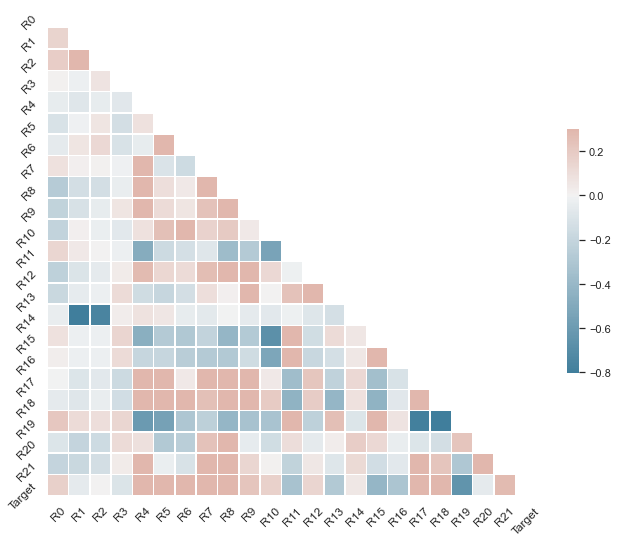

In [6]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12, rotation = 45)
plt.savefig( 'corr.pdf', bbox_inches='tight' ) 
plt.show()


# KfoldCV

In [ ]:
from utils.KFCV import do_kfold
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
do_kfold(reg, x, y, CV_file='15_folds.pkl')

## Create CV indeces

In [12]:
from utils_.KFCV import *
for i in [5,10,15]:
    create_KFCV_index(i, x, x['R0'])
        

"15_folds.pkl" is created successfully.


C:\Users\Fathalla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"


In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

def get_CV_res(lst):
    q,w,e=0,0,0
    for i in lst:
        q+=i[0]
        w=i[1]
        e+=i[2]
    print(q/10,w/10,e/10)

## Bagging

In [24]:
from sklearn.ensemble import BaggingRegressor
for train_index, test_index in skf.split(x, df['R0']):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = BaggingRegressor(n_estimators=100)
    
    reg.fit(X_train, y_train)
    test_pred = reg.predict(X_test)
    print(get_res(y_test,test_pred))

C:\Users\Fathalla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.0769583, 0.1300705, 0.8351391]
[0.0575212, 0.0818618, 0.9301657]
[0.046486, 0.058452, 0.9811883]
[0.0467443, 0.0731589, 0.9834152]
[0.0775991, 0.1032328, 0.9723618]
[0.090126, 0.1340795, 0.9555224]
[0.0697079, 0.1227428, 0.9539148]
[0.1028559, 0.1493901, 0.9115424]
[0.0837958, 0.1659823, 0.9495716]
[0.0823898, 0.1201186, 0.9677538]


In [37]:
Bagging = [
    [0.0769583, 0.1300705, 0.8351391],
    [0.0575212, 0.0818618, 0.9301657],
    [0.046486, 0.058452, 0.9811883],
    [0.0467443, 0.0731589, 0.9834152],
    [0.0775991, 0.1032328, 0.9723618],
    [0.090126, 0.1340795, 0.9555224],
    [0.0697079, 0.1227428, 0.9539148],
    [0.1028559, 0.1493901, 0.9115424],
    [0.0837958, 0.1659823, 0.9495716],
    [0.0823898, 0.1201186, 0.9677538]]
get_CV_res(Bagging)

0.07341842999999999 0.012011860000000001 0.94405751


## Boosting

In [26]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor

# skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(x, df['R0']):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train.columns)
    reg = CatBoostRegressor(iterations=1000,cat_features=['R0'])
    reg.fit(X_train, y_train,verbose=0)
    test_pred = reg.predict(X_test)
    print(get_res(y_test,test_pred))

C:\Users\Fathalla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Index(['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
       'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
       'R21'],
      dtype='object')
[0.0754171, 0.1161694, 0.8684945]
Index(['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
       'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
       'R21'],
      dtype='object')
[0.0388892, 0.0505435, 0.9733782]
Index(['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
       'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
       'R21'],
      dtype='object')
[0.0817036, 0.0971997, 0.9479812]
Index(['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
       'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
       'R21'],
      dtype='object')
[0.050761, 0.0715231, 0.9841486]
Index(['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
       'R11', 'R12', 'R13', 'R14', 'R15

In [29]:
Boosting = [
    [0.0754171, 0.1161694, 0.8684945],
    [0.0388892, 0.0505435, 0.9733782],
    [0.0817036, 0.0971997, 0.9479812],
    [0.050761, 0.0715231, 0.9841486],
    [0.0534822, 0.0784674, 0.9840319],
    [0.0776615, 0.1211144, 0.9637082],
    [0.0442779, 0.0849412, 0.9779298],
    [0.0663449, 0.1006893, 0.9598156],
    [0.0912947, 0.2376121, 0.8966552],
    [0.101208, 0.1372818, 0.9578805]]
get_CV_res(Boosting)

## RF

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

# skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(x, df['R0']):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = RandomForestRegressor(n_estimators=100)
#     reg = CatBoostRegressor(iterations=1000,cat_features=['R0'])
    reg.fit(X_train, y_train)
    test_pred = reg.predict(X_test)
    print(get_res(y_test,test_pred))

C:\Users\Fathalla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.0779464, 0.1193789, 0.8611279]
[0.0571399, 0.0825626, 0.9289648]
[0.0462599, 0.0604578, 0.9798751]
[0.0399203, 0.0703855, 0.9846489]
[0.0836739, 0.1114795, 0.9677697]
[0.0890265, 0.132988, 0.9562436]
[0.0735631, 0.1288602, 0.9492066]
[0.0944777, 0.1370779, 0.9255223]
[0.0791806, 0.1640192, 0.9507574]
[0.0905008, 0.1267673, 0.9640853]


In [38]:
RF = [
    [0.0779464, 0.1193789, 0.8611279],
    [0.0571399, 0.0825626, 0.9289648],
    [0.0462599, 0.0604578, 0.9798751],
    [0.0399203, 0.0703855, 0.9846489],
    [0.0836739, 0.1114795, 0.9677697],
    [0.0890265, 0.132988, 0.9562436],
    [0.0735631, 0.1288602, 0.9492066],
    [0.0944777, 0.1370779, 0.9255223],
    [0.0791806, 0.1640192, 0.9507574],
    [0.0905008, 0.1267673, 0.9640853]]
get_CV_res(RF)

0.07316891 0.01267673 0.94682016


# Histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

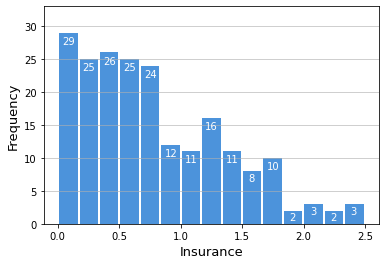

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(x=df['y'], bins=15, color='#0066cc',
                            alpha=0.7, rwidth=0.90)
plt.grid(axis='y', alpha=0.75)
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 11 if maxfreq % 10 else maxfreq + 10)
plt.xlabel('Insurance', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
for i in ax.patches:
    if i.get_height()>9:
        ax.text(i.get_x()+0.025, i.get_height()-1.7, \
            str(int((i.get_height()))), fontsize=10,
                color='White')
    else:
        ax.text(i.get_x()+0.045, i.get_height()-1.5, \
            str(int((i.get_height()))), fontsize=10,
                color='White')
plt.savefig( 'C:/Users/Fathalla/Desktop/histo.pdf', bbox_inches='tight' ) 
plt.show()

## CatBoostRegressor

In [18]:
from catboost import CatBoostRegressor
reg = CatBoostRegressor(iterations=1000,cat_features=['a'])
reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
get_res(y_test,test_pred)

Learning rate set to 0.028321
0:	learn: 0.5672154	total: 27.3ms	remaining: 27.3s
1:	learn: 0.5579694	total: 40.8ms	remaining: 20.4s
2:	learn: 0.5498138	total: 53.1ms	remaining: 17.6s
3:	learn: 0.5404024	total: 64.9ms	remaining: 16.2s
4:	learn: 0.5313126	total: 76.8ms	remaining: 15.3s
5:	learn: 0.5222403	total: 88.9ms	remaining: 14.7s
6:	learn: 0.5148382	total: 101ms	remaining: 14.3s
7:	learn: 0.5061621	total: 112ms	remaining: 13.9s
8:	learn: 0.4974457	total: 124ms	remaining: 13.7s
9:	learn: 0.4888385	total: 136ms	remaining: 13.5s
10:	learn: 0.4812401	total: 147ms	remaining: 13.2s
11:	learn: 0.4733360	total: 158ms	remaining: 13s
12:	learn: 0.4663043	total: 170ms	remaining: 12.9s
13:	learn: 0.4586149	total: 182ms	remaining: 12.8s
14:	learn: 0.4520239	total: 199ms	remaining: 13.1s
15:	learn: 0.4444016	total: 219ms	remaining: 13.4s
16:	learn: 0.4377487	total: 231ms	remaining: 13.4s
17:	learn: 0.4306159	total: 254ms	remaining: 13.9s
18:	learn: 0.4240694	total: 280ms	remaining: 14.4s
19:	lea

160:	learn: 0.0814132	total: 2.22s	remaining: 11.6s
161:	learn: 0.0808365	total: 2.24s	remaining: 11.6s
162:	learn: 0.0801250	total: 2.25s	remaining: 11.5s
163:	learn: 0.0793194	total: 2.26s	remaining: 11.5s
164:	learn: 0.0787376	total: 2.27s	remaining: 11.5s
165:	learn: 0.0781984	total: 2.28s	remaining: 11.5s
166:	learn: 0.0774847	total: 2.3s	remaining: 11.5s
167:	learn: 0.0768009	total: 2.31s	remaining: 11.4s
168:	learn: 0.0762475	total: 2.32s	remaining: 11.4s
169:	learn: 0.0758320	total: 2.33s	remaining: 11.4s
170:	learn: 0.0753328	total: 2.34s	remaining: 11.4s
171:	learn: 0.0748598	total: 2.36s	remaining: 11.3s
172:	learn: 0.0743026	total: 2.37s	remaining: 11.3s
173:	learn: 0.0736483	total: 2.38s	remaining: 11.3s
174:	learn: 0.0729998	total: 2.39s	remaining: 11.3s
175:	learn: 0.0726151	total: 2.4s	remaining: 11.3s
176:	learn: 0.0721169	total: 2.46s	remaining: 11.4s
177:	learn: 0.0714913	total: 2.47s	remaining: 11.4s
178:	learn: 0.0708050	total: 2.48s	remaining: 11.4s
179:	learn: 0.

331:	learn: 0.0300566	total: 4.48s	remaining: 9.01s
332:	learn: 0.0298986	total: 4.49s	remaining: 8.99s
333:	learn: 0.0298399	total: 4.5s	remaining: 8.98s
334:	learn: 0.0297593	total: 4.51s	remaining: 8.96s
335:	learn: 0.0296846	total: 4.53s	remaining: 8.95s
336:	learn: 0.0296289	total: 4.54s	remaining: 8.93s
337:	learn: 0.0295715	total: 4.55s	remaining: 8.92s
338:	learn: 0.0294791	total: 4.56s	remaining: 8.9s
339:	learn: 0.0293810	total: 4.58s	remaining: 8.89s
340:	learn: 0.0291797	total: 4.59s	remaining: 8.87s
341:	learn: 0.0291270	total: 4.6s	remaining: 8.85s
342:	learn: 0.0290727	total: 4.61s	remaining: 8.84s
343:	learn: 0.0290117	total: 4.62s	remaining: 8.82s
344:	learn: 0.0289481	total: 4.64s	remaining: 8.8s
345:	learn: 0.0288333	total: 4.65s	remaining: 8.79s
346:	learn: 0.0287714	total: 4.66s	remaining: 8.77s
347:	learn: 0.0287087	total: 4.68s	remaining: 8.77s
348:	learn: 0.0285519	total: 4.7s	remaining: 8.76s
349:	learn: 0.0283598	total: 4.72s	remaining: 8.77s
350:	learn: 0.028

491:	learn: 0.0157920	total: 6.75s	remaining: 6.97s
492:	learn: 0.0157419	total: 6.76s	remaining: 6.96s
493:	learn: 0.0156787	total: 6.78s	remaining: 6.94s
494:	learn: 0.0156100	total: 6.8s	remaining: 6.94s
495:	learn: 0.0155898	total: 6.81s	remaining: 6.92s
496:	learn: 0.0154950	total: 6.82s	remaining: 6.9s
497:	learn: 0.0154249	total: 6.83s	remaining: 6.89s
498:	learn: 0.0153651	total: 6.85s	remaining: 6.87s
499:	learn: 0.0153518	total: 6.86s	remaining: 6.86s
500:	learn: 0.0152794	total: 6.87s	remaining: 6.84s
501:	learn: 0.0152129	total: 6.89s	remaining: 6.83s
502:	learn: 0.0151597	total: 6.9s	remaining: 6.82s
503:	learn: 0.0150986	total: 6.91s	remaining: 6.8s
504:	learn: 0.0150301	total: 6.96s	remaining: 6.82s
505:	learn: 0.0150008	total: 6.97s	remaining: 6.81s
506:	learn: 0.0149176	total: 6.99s	remaining: 6.79s
507:	learn: 0.0148452	total: 7s	remaining: 6.78s
508:	learn: 0.0147797	total: 7.01s	remaining: 6.77s
509:	learn: 0.0147224	total: 7.03s	remaining: 6.75s
510:	learn: 0.01468

663:	learn: 0.0090590	total: 9.24s	remaining: 4.68s
664:	learn: 0.0090512	total: 9.26s	remaining: 4.66s
665:	learn: 0.0090274	total: 9.27s	remaining: 4.65s
666:	learn: 0.0089998	total: 9.28s	remaining: 4.63s
667:	learn: 0.0089638	total: 9.29s	remaining: 4.62s
668:	learn: 0.0089364	total: 9.31s	remaining: 4.61s
669:	learn: 0.0089120	total: 9.32s	remaining: 4.59s
670:	learn: 0.0088844	total: 9.34s	remaining: 4.58s
671:	learn: 0.0088548	total: 9.35s	remaining: 4.56s
672:	learn: 0.0088287	total: 9.36s	remaining: 4.55s
673:	learn: 0.0088070	total: 9.37s	remaining: 4.53s
674:	learn: 0.0087917	total: 9.39s	remaining: 4.52s
675:	learn: 0.0087643	total: 9.4s	remaining: 4.51s
676:	learn: 0.0087309	total: 9.42s	remaining: 4.49s
677:	learn: 0.0086789	total: 9.44s	remaining: 4.48s
678:	learn: 0.0086622	total: 9.45s	remaining: 4.47s
679:	learn: 0.0086484	total: 9.46s	remaining: 4.45s
680:	learn: 0.0086410	total: 9.48s	remaining: 4.44s
681:	learn: 0.0086133	total: 9.49s	remaining: 4.42s
682:	learn: 0

828:	learn: 0.0057915	total: 11.4s	remaining: 2.36s
829:	learn: 0.0057854	total: 11.5s	remaining: 2.35s
830:	learn: 0.0057777	total: 11.5s	remaining: 2.33s
831:	learn: 0.0057483	total: 11.5s	remaining: 2.32s
832:	learn: 0.0057289	total: 11.5s	remaining: 2.3s
833:	learn: 0.0057240	total: 11.5s	remaining: 2.29s
834:	learn: 0.0057141	total: 11.5s	remaining: 2.28s
835:	learn: 0.0057094	total: 11.5s	remaining: 2.26s
836:	learn: 0.0057029	total: 11.6s	remaining: 2.25s
837:	learn: 0.0056835	total: 11.6s	remaining: 2.23s
838:	learn: 0.0056586	total: 11.6s	remaining: 2.22s
839:	learn: 0.0056370	total: 11.6s	remaining: 2.21s
840:	learn: 0.0056293	total: 11.6s	remaining: 2.19s
841:	learn: 0.0056274	total: 11.6s	remaining: 2.18s
842:	learn: 0.0056043	total: 11.6s	remaining: 2.17s
843:	learn: 0.0055932	total: 11.7s	remaining: 2.15s
844:	learn: 0.0055803	total: 11.7s	remaining: 2.14s
845:	learn: 0.0055726	total: 11.7s	remaining: 2.13s
846:	learn: 0.0055712	total: 11.7s	remaining: 2.11s
847:	learn: 0

993:	learn: 0.0040621	total: 13.7s	remaining: 82.5ms
994:	learn: 0.0040537	total: 13.7s	remaining: 68.7ms
995:	learn: 0.0040481	total: 13.7s	remaining: 55ms
996:	learn: 0.0040454	total: 13.7s	remaining: 41.2ms
997:	learn: 0.0040322	total: 13.7s	remaining: 27.5ms
998:	learn: 0.0040275	total: 13.7s	remaining: 13.7ms
999:	learn: 0.0040139	total: 13.7s	remaining: 0us


[0.053294, 0.0912457, 0.9769189]

In [8]:
for i,j in zip(df.columns,reg.get_feature_importance()):
    print(i,j)

a 1.1505882105933356
b 0.7276272185700902
c 0.8325848287485703
d 0.6529902384842844
e 2.71580939482036
f 1.7706042331606695
g 1.2904327399384294
h 2.476037829869934
i 3.0124893398426127
j 1.5337071154800623
k 2.016499696821285
l 1.6550526079701486
m 2.034370170537918
n 1.445473344908923
o 1.9458987035584667
p 46.28311682617749
q 3.6250204700701265
r 12.586323177334622
s 5.826837093522077
t 3.822704996973802
u 0.983394017136039
v 1.61243774548076
y 0.0


## BaggingRegressor

In [14]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
reg = BaggingRegressor(n_estimators=300)
reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
get_res(y_test,test_pred)

[0.070656, 0.1060949, 0.9687952]

## RF

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
get_res(y_test,test_pred)

[0.068672, 0.1016917, 0.9713316]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

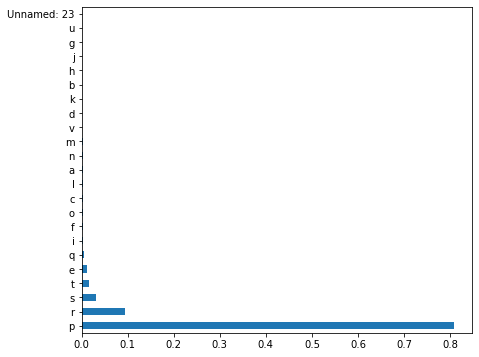

In [39]:
def plt_feature_importances(model, features_names, show_feature_imprtances=0):
    # for more feature importance https://www.kaggle.com/grfiv4/plotting-feature-importances
    feature_import = pd.Series(model.feature_importances_, index=features_names)
    feature_import = feature_import.sort_values(ascending=False)
    if show_feature_imprtances:print( feature_import )
    feature_import.plot(kind='barh', figsize=(7,6))
    plt.show()
plt_feature_importances(reg, dd.columns)    

## SVR

In [35]:
from sklearn.svm import SVR

reg = SVR() 
reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
print(k,d,t , get_res(y_test,test_pred))

rbf 100 100 [0.2985282, 0.4118919, 0.5296741]


# Results Visualization for target binarized 15 fold

In [3]:
import pandas as pd
ba = pd.read_csv('15 fold T-Bins/BaggingRegressor_15-folds.csv')
bo = pd.read_csv('15 fold T-Bins/CatBoostRegressor_15-folds.csv')
r = pd.read_csv('15 fold T-Bins/RandomForestRegressor_15-folds.csv')
ba.columns

Index(['Unnamed: 0', 'mean_absolute_error', 'mean_squared_error', 'RMSE',
       'r2_score'],
      dtype='object')

## plot MAE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

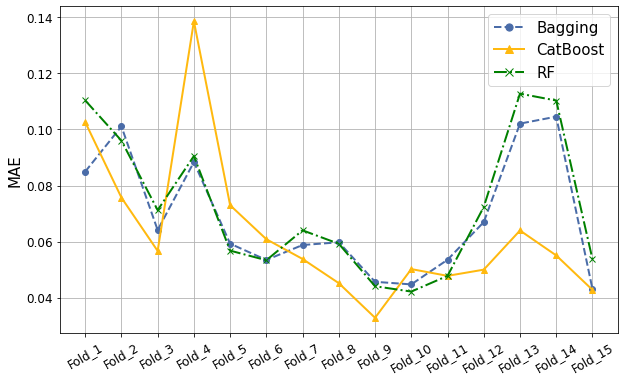

In [31]:
a = ba['mean_absolute_error'][:-3]
b = bo['mean_absolute_error'][:-3]
c = r['mean_absolute_error'][:-3]

sz = 15
mark_size = 6
x = list(range(1,16))
xTickMarks = ['Fold_%d'%(i+1) for i in range(15)]

plt.figure(figsize=(10,6))
# plt.title('', fontsize=80)

plt.plot(x , a, color='#4a6ca8', marker='o', linestyle='--', linewidth=2, label='Bagging', ms = mark_size)
plt.plot(x , b, color='#ffb90f', marker='^', linestyle='-', linewidth=2, label='CatBoost', ms = mark_size)
plt.plot(x , c, color='green', marker='x', linestyle='-.', linewidth=2, label='RF', ms = mark_size)

plt.legend( markerscale=1.2, scatterpoints=5, fontsize=15)
plt.tick_params(labelsize=12)

plt.xticks(x, xTickMarks, rotation = 30)
plt.ylabel('MAE', fontsize=sz)    
plt.grid()
plt.savefig('C:/Users/Fathalla/Desktop/MAE-err.pdf', bbox_inches='tight')
plt.show()

## {R^2} Barchart 

<ipython-input-66-ebc4b1bfde7c>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  xtickNames = ax.set_xticklabels(xTickMarks)


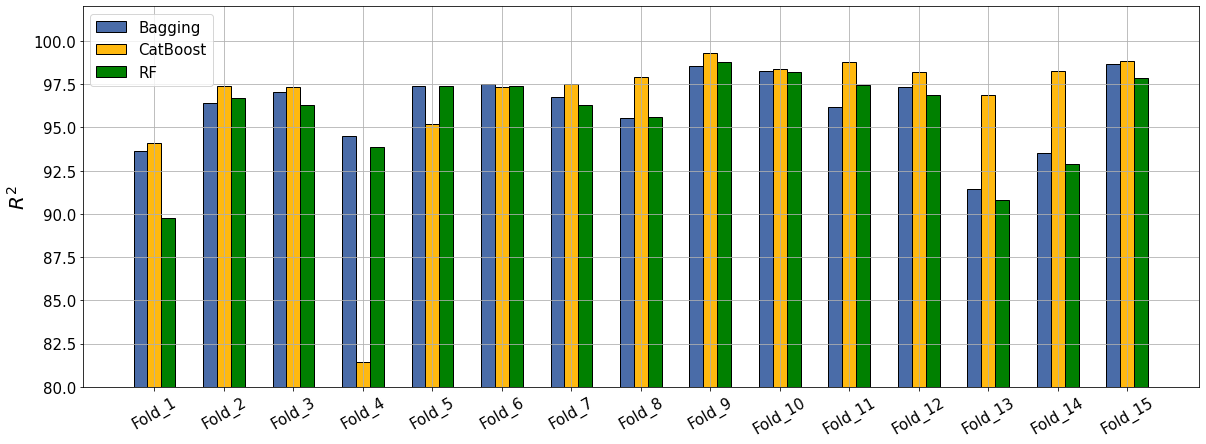

In [66]:
a = ba['r3_score'][:-3]*100
b = bo['r3_score'][:-3]*100
c = r['r3_score'][:-3]*100
import numpy as np
import matplotlib.pyplot as plt

N = 15
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ind = np.arange(N)                # the x locations for the groups
width = 0.2                      # the width of the bars

## the bars
rects1 = ax.bar(ind-width, a, width,
                color='#4a6ca8',edgecolor='black',
                error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind, b, width,
                    color='#ffb90f',edgecolor='black',
                    error_kw=dict(elinewidth=2,ecolor='black'))

rects3 = ax.bar(ind+width, c, width,
                    color='green',edgecolor='black',
                    error_kw=dict(elinewidth=2,ecolor='green'))

# axes and labels
# ax.set_xlim(-width,len(ind)+width)
# ax.set_ylim(0,45)
ax.set_ylabel('$R^2$', fontsize=20)
xTickMarks = ['Fold_%d'%(i+1) for i in range(15)]

xtickNames = ax.set_xticklabels(xTickMarks)

ax.set_xticks(ind+width - 0.2)

## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Bagging', 'CatBoost', 'RF'),  fontsize =15)
plt.xticks(fontsize=15, rotation = 30)
plt.yticks(fontsize=15)
plt.grid()
plt.ylim((80,102))
plt.savefig('R2_bar.pdf', bbox_inches='tight')

plt.show()